In [1]:
# conventional imports
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reading data...

Reading data from the dataset using `ImageDataGenerator` <br>
Also, here I am performing **data augmentation** to train our model on a greater data than we already have. Here, we are 
* Flipping the image horizontally
* Zooming upto 20%
* Shearing upto 20%
* Rotating upto 20 degrees

NOTE: The rescale parameter in the `ImageDataGenerator` is to make all the numbers in an image from 0-1 instead of 0-255

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "../input/dogs-cats-images/dataset/training_set"
test_dir = "../input/dogs-cats-images/dataset/test_set"
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 200
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
    validation_split=0.2
)
test_generator = ImageDataGenerator(
    rescale=1./255
)
train_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='training',# training subset
)
val_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='validation',# validation subset
)
test_data = test_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Plotting augmented data

The code below shows the result of all the 4 augmentations.

Text(0.5, 1.0, 'Fourth')

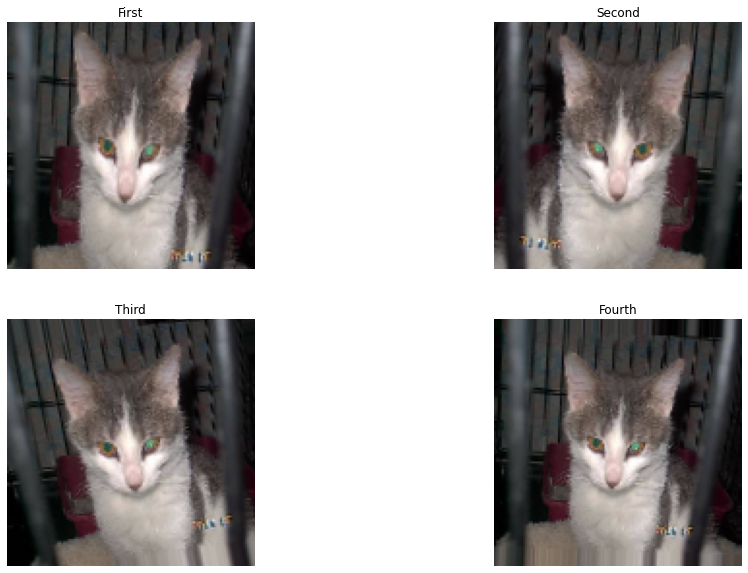

In [45]:
fig = plt.figure(figsize=(16, 10))
rows, cols = 2, 2
fig.add_subplot(rows, cols, 1)
# showing image
plt.imshow(train_data[0][0][0])
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, cols, 2)
# showing image
plt.imshow(train_data[0][0][0])
plt.axis('off')
plt.title("Second")

fig.add_subplot(rows, cols, 3)
# showing image
plt.imshow(train_data[0][0][0])
plt.axis('off')
plt.title("Third")

fig.add_subplot(rows, cols, 4)
# showing image
plt.imshow(train_data[0][0][0])
plt.axis('off')
plt.title("Fourth")

# Creating the model

Here I am creating a model with the following layers.

In [53]:
model = keras.Sequential([
    layers.Conv2D(64, (3,3), input_shape=[IMG_WIDTH, IMG_HEIGHT, 3]),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(16, (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 16)       

# Training the model
Here we are training the model on train data and for validation, we are using valdation dataset.

In [56]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)
history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)

Epoch 1/25
32/32 [==============================] - 53s 2s/step - loss: 0.4391 - binary_accuracy: 0.7985 - val_loss: 0.4520 - val_binary_accuracy: 0.7919
Epoch 2/25
32/32 [==============================] - 50s 2s/step - loss: 0.3942 - binary_accuracy: 0.8181 - val_loss: 0.4428 - val_binary_accuracy: 0.7925
Epoch 3/25
32/32 [==============================] - 52s 2s/step - loss: 0.3907 - binary_accuracy: 0.8223 - val_loss: 0.4342 - val_binary_accuracy: 0.7881
Epoch 4/25
32/32 [==============================] - 50s 2s/step - loss: 0.3811 - binary_accuracy: 0.8308 - val_loss: 0.4528 - val_binary_accuracy: 0.7906
Epoch 5/25
32/32 [==============================] - 50s 2s/step - loss: 0.3882 - binary_accuracy: 0.8302 - val_loss: 0.4414 - val_binary_accuracy: 0.8037
Epoch 6/25
32/32 [==============================] - 51s 2s/step - loss: 0.3929 - binary_accuracy: 0.8202 - val_loss: 0.4482 - val_binary_accuracy: 0.7969
Epoch 7/25
32/32 [==============================] - 51s 2s/step - loss: 0.38

# Plotting the training history

These graphs will tell us if our model is overfitting or underfitting

<AxesSubplot:>

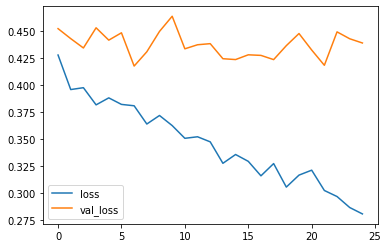

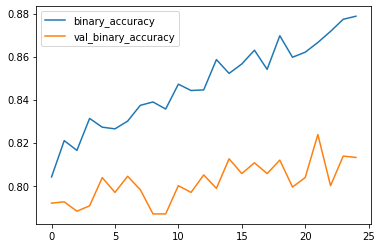

In [57]:
history = pd.DataFrame(history.history)
history.loc[:, ['loss', 'val_loss']].plot()
history.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

# Evaluating the model

Using the test data to evaluate the accuracy of our model

In [58]:
loss, acc = model.evaluate(test_data)
print(acc)

10/10 [==============================] - 15s 2s/step - loss: 0.4401 - binary_accuracy: 0.8185
0.8184999823570251


As you can see, we have achieved 82% of accuracy which can be improved...

Let's test it on some images...

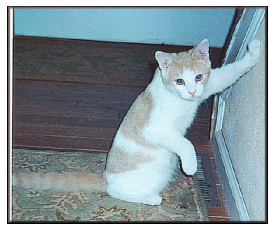

In [73]:
path = "../input/dogs-cats-images/dataset/test_set/cats/cat.4001.jpg"
image = tf.io.read_file(path)
image = tf.io.decode_jpeg(image)
plt.axis(False)
plt.imshow(image)
plt.show()
image = tf.image.resize(image, size=[128, 128])
image.shape
x = tf.expand_dims(image, axis=0)


In [74]:
prediction = model.predict(x)
index = round(prediction[0][0])
["cat", "dog"][index]

'cat'

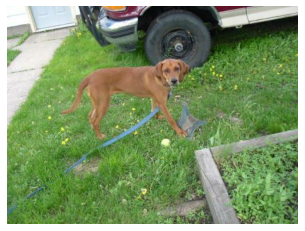

In [75]:
path = "../input/dogs-cats-images/dataset/test_set/dogs/dog.4021.jpg"
image = tf.io.read_file(path)
image = tf.io.decode_jpeg(image)
plt.axis(False)
plt.imshow(image)
plt.show()
image = tf.image.resize(image, size=[128, 128])
image.shape
x = tf.expand_dims(image, axis=0)

In [76]:
prediction = model.predict(x)
index = round(prediction[0][0])
["cat", "dog"][index]

'dog'

As you can see, it is doing pretty well. ^_^